In [1]:
# CPSC 424 Assignment 5 Question 2
#
# In this question, you will compute curvature, normals, tangents, and arc
# length for three curves given as parametric symbolic functions ([x1, y1],
# etc.).
#
# You can use SymEngine symbolic differentiation tools to help you
# compute these quantities. The relevant command is diff(). The
# sumbolic integration tool int() can also be helpful. Alternatively,
# you can manually hardcode the formulas.
# https://github.com/symengine/SymEngine.jl
#
#
# Finally, to visualize the computed quantities you should pass them
# into the draw_curve_helper() function. The template code below
# visualizes some dummy values; you should replace them with the
# requested values.

In [2]:
# Include packages
using Plots
using SymEngine
using LinearAlgebra

In [3]:
# ======================================================================
#                      HELPER FUNCTIONS
# ======================================================================
#
# function draw_curve_2D(pos, c, v, displace)
#
# Draws a curve formed by the specified points pos. Optionally, colors
# the line according to the scalars c. Also, it can draw normals or
# tangents specified on the curve as the vectors v. 
#
# pos: n x 2 vector specifying sampling points on the curve
# c(optional): n x 1  vector for scalars to be used as colors on
# curve.
# v(optional): n x 2 vector specifying the normals or tangents.
# displace(optional between 0 and 1): if nonzero, the vectors v are
# displaced slightly for visualization purposes.
#

function draw_curve_2D(pos, c, v, displace)
    my_cgrad = cgrad([:blue, :green, :yellow])
    
    # Only draw the curve
    if (isempty(c))
        p = plot(pos[:, 1], pos[:, 2])
    else
        # Draw colors 
        p = plot(pos[:, 1], pos[:, 2], lc=my_cgrad, line_z=c)
    end
    
    # Draw vectors
    if (!isempty(v))
        n_vectors_draw = 15
        stride = Int(max(floor(size(v,1)/ n_vectors_draw), 1))

        x_pos = Float64[]
        y_pos = Float64[]
        v_x = Float64[]
        v_y = Float64[]

        for i = 1:stride:size(v, 1)
            v_ = [v[i,1] v[i, 2]]
            r = nullspace(v_)
            r = r/norm(r, 2)
            delta = norm(v[i, :], 2) * displace * reshape(r, 1, 2)
            p = pos[i, :] + reshape(delta, 2, 1) 
            
            v_ = v[i,:]
    
            x_pos = vcat(x_pos, p[1, :])
            y_pos = vcat(y_pos, p[2, :])
            v_x = vcat(v_x, v_[1, :])
            v_y = vcat(v_y, v_[2, :])
        end  
        
        p = quiver!(x_pos, y_pos, quiver=(v_x, v_y))
    end
    
    return p
end

draw_curve_2D (generic function with 1 method)

In [4]:
# ======================================================================
#                      HELPER FUNCTIONS
# ======================================================================
#
# function draw_curve_helper(pos, curvature, arclength, tangent, normal)
#
# Draws a curve sampled at n points.
#
# pos is a n x 2 matrix with the point locations on the curve
# curvature is a vector of length n specifying the curvature at each x 
# arclength is a vector of length n specifying the arclength at each x
# tangent is a matrix of size n x 2 specifying the tangent at each x
# normal is a matrix of size n x 2 specifying the normal at each x

function draw_curve_helper(pos, curvature, arclength, tangent, normal)
    # Draw curvature
    p1 = plot(draw_curve_2D(pos, curvature, [], 0), title="Curvature")
    p2 = plot(draw_curve_2D(pos, arclength, [], 0), title="Arc-length")
    p3 = plot(draw_curve_2D(pos, [], normal, 0), title="Normals")
    p4 = plot(draw_curve_2D(pos, [], tangent, 0), title="Tangents")
    
    plot(p1, p3, p2, p4, layout=(2,2), legend=false)
end

draw_curve_helper (generic function with 1 method)

In [5]:
# t-values range from 0 to 2
n_t = Int(2 / 0.01)
t_vals = collect(range(0, 2, length=n_t))

# place holders for tangent, normal, arclength, and curvature.
dummy_scalar_vals = t_vals;
dummy_vector_vals = ones(n_t, 2) * 0.1;

In [6]:
# Register t as a symbolic variable to allow symbolic differentiation
t = symbols(:t)

t

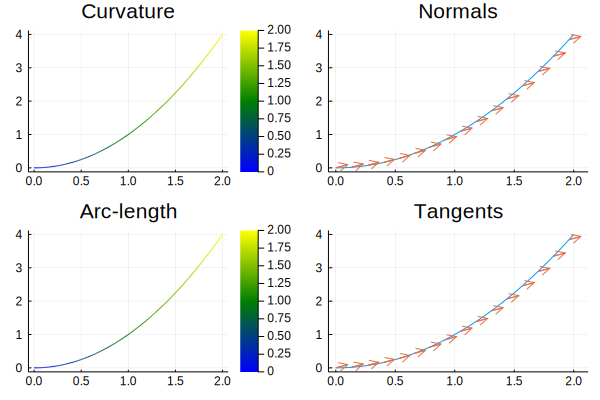

In [7]:
# ===================================================================
#                            Curve 1
# ===================================================================

x1 = t
y1 = t.^2

# Evaluate curve
x = float(x1.(t_vals))
y = float(y1.(t_vals))
pos = hcat(x, y)


# Compute curvature, arclength, tangents and normals at each t-value here.




# Draw the curve
draw_curve_helper(pos, dummy_scalar_vals, dummy_scalar_vals, dummy_vector_vals, dummy_vector_vals)

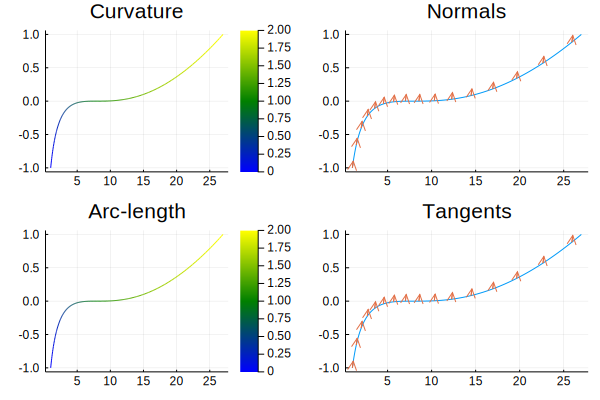

In [8]:
# ===================================================================
#                            Curve 2
# ===================================================================

x2 = (t+1).^3
y2 = (t-1).^3

# Evaluate curve
x = float(x2.(t_vals))
y = float(y2.(t_vals))
pos = hcat(x, y)


# Compute curvature, arclength, tangents and normals at each t-value here.



# Draw the curve
draw_curve_helper(pos, dummy_scalar_vals, dummy_scalar_vals, dummy_vector_vals, dummy_vector_vals)

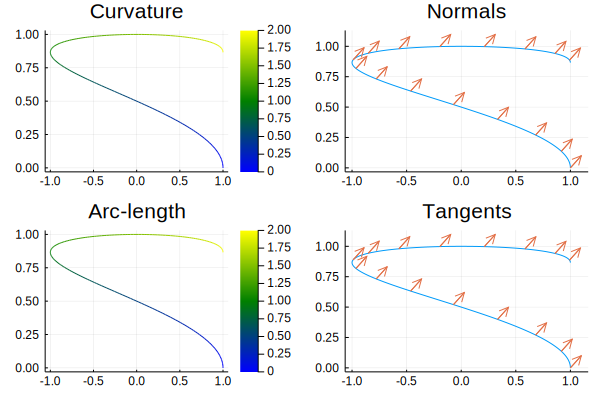

In [9]:
# ===================================================================
#                            Curve 3
# ===================================================================

x3 = cos(t.*pi)
y3 = sin(t.*pi/3)

# Evaluate curve
x = float(x3.(t_vals))
y = float(y3.(t_vals))
pos = hcat(x, y)


# Compute curvature, arclength, tangents and normals at each t-value here.



# Draw the curve
draw_curve_helper(pos, dummy_scalar_vals, dummy_scalar_vals, dummy_vector_vals, dummy_vector_vals)